# Time-Series Prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.layers import GRU, Embedding, LSTM

from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
#!pip install yfinance
import yfinance as yf

In [7]:
#!pip install pandas_datareader
from pandas_datareader import data as wb

### Download Stock Market Data using Yahoo Finance

[*********************100%***********************]  1 of 1 completed


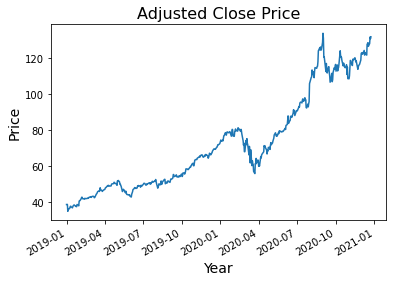

In [13]:
# Get the data of the stock AAPL
aapl = yf.download('AAPL','2019-01-01','2020-12-28')
# Plot the close price of the AAPL
aapl['Adj Close'].plot()
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

In [14]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.518612,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.562561,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.721451,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.203678,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.123104,219111200


In [15]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,73.100408,74.039452,72.233466,73.196016,72.663354,1.324216e+08
std,26.920227,27.321302,26.376295,26.856523,27.103660,6.348691e+07
min,35.994999,36.430000,35.500000,35.547501,34.721451,2.420510e+07
25%,50.768749,51.113126,50.352500,50.717500,49.929929,8.993220e+07
50%,66.389999,67.000000,65.716251,66.557503,66.063404,1.155105e+08
75%,90.996876,91.753748,89.570623,91.027496,90.707176,1.554280e+08
max,137.589996,137.979996,131.100006,134.179993,133.948898,4.268848e+08


In [11]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 447 entries, 2018-12-31 to 2020-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       447 non-null    float64
 1   High       447 non-null    float64
 2   Low        447 non-null    float64
 3   Close      447 non-null    float64
 4   Adj Close  447 non-null    float64
 5   Volume     447 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 24.4 KB


In [ ]:
#aapl_daily_returns = aapl['Adj Close'].pct_change()
#aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()

A nice tutorial on financial data analysis: https://www.codingfinance.com/post/2018-04-03-calc-returns-py/

### Calculating the daily and monthly returns for individual stock:

Once we downloaded the stock prices from yahoo finance, the next thing to do is to calculate the returns. We will again use pandas package to do the calculations. We have already downloaded the price data for AAPL above, if you haven’t done that then see the above section. We will calculate the monthly and daily price returns.
```python
aapl_daily_returns = aapl['Adj Close'].pct_change()
aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()
```

### Calculating the cumulative returns for individual stock:

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or, in other words, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.
```python
aapl_cum_returns = (aapl_daily_returns + 1).cumprod()
```

#### Plot the data:
```python
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(aapl_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("AAPL daily returns data")
plt.show()
```

### Download Several Stocks

In [ ]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP','GOOG','MSFT']

stock_data = pd.DataFrame(columns=tickers_list)
# Fetch the data

for ticker in tickers_list:
    stock_data[ticker] = yf.download(ticker, '2019-1-1', '2020-10-08')['Adj Close']
# Print first 5 rows of the data
#stock_data.head()


# Plot all the close prices
# the cumulative returns for individual stocks
((stock_data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()



In [ ]:
stock_data.head()

### Download Stock Market Data using Pandas DataReader

In [ ]:
#import datetime as dt

start = '2019-6-20'
end = '2019-7-20'

tickers = ['CSCO','AXP','HD','PG']

thelen = len(tickers)

price_data = []
for ticker in tickers:
    prices = wb.DataReader(ticker, start = start, end = end, data_source='yahoo')[['Adj Close']]
    price_data.append(prices.assign(ticker=ticker)[['ticker', 'Adj Close']])

stock_df = pd.concat(price_data)
#stock_df.dtypes
#stock_df.head()
#stock_df.shape


In [ ]:
stock_df

In [ ]:
# Create a pivot table to summarise data
stock_df = stock_df.reset_index()
stock_df = stock_df.set_index('Date')
table = stock_df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

In [ ]:
table.shape

In [ ]:
for column in table.columns:
    f = table[column] 
    #f = ((f.pct_change()+1).cumprod())
    f.plot(label=column);
    plt.legend()
    plt.ylabel('price in [USD]')

plt.show()

In [ ]:
# Plot all the close prices
# the cumulative returns for individual stocks
((table.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Load Data from a Table (csv)

In [ ]:
water_data = pd.read_csv('WaterLevel-Dataset.csv')

Reverse data as it is ordered backwards

In [ ]:
water_data = water_data.iloc[::-1]
water_data.reset_index(inplace=True, drop=True)
water_data.head()

### Check if there any Missing Data

In [ ]:
water_data.isnull().sum()

### Set the Date column as index

In [ ]:
# convert to datetime
water_data['Date'] = pd.to_datetime(water_data['Date'])

# set the index
water_data.set_index('Date', inplace=True)
water_data.info()

In [ ]:
water_data.head()

### Visualise Data

In [ ]:
water_data['Capacity (%)'].plot()

In [ ]:
water_data['Water Level (m)'].plot()

In [ ]:
water_data.values.shape

### Split the Data into Train/test subsets .. ONLY use IBM

In [ ]:
stock_data.shape

In [ ]:
data = stock_data['IBM']
data.plot()

In [ ]:
train_df = data[:380]#aapl['Adj Close'][:250]#df['Water Level (m)'][0:100]
print('train shape:', train_df.shape)
test_df = data[380:]#aapl['Adj Close'][250:]#df['Water Level (m)'][100:]
print('test shape: ',test_df.shape)

print("Min x:", np.min(train_df))
print("Max x:", np.max(train_df))

### Normalise the Data into values between 0 and 1

In [ ]:
## After this step train and test will become numpy matrices instead of pandas dataframes
## NOTICE: we use the model that is fitted to the train data to scale the test data .. 
## very important to do it this way!

x_scaler = MinMaxScaler()
train = x_scaler.fit_transform(train_df.values.reshape(-1, 1))
test = x_scaler.transform(test_df.values.reshape(-1, 1))

In [ ]:
# make sure values are between 0-1
print("Min x:", np.min(train))
print("Max x:", np.max(train))

### To Split Data into Sequences


In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

#### Create sequences for training data

In [ ]:
seq = [1,2,3,4,5,6,7,8,9,10]
steps = 3
split_sequence(seq,steps)

In [ ]:
# define input sequence
train #train['Capacity (%)'].values
# choose a number of time steps
n_steps = 5
# split into samples
X_train, y_train = split_sequence(train, n_steps)

In [ ]:
X_train

#### Create sequences for test data

In [ ]:
# define test sequence
#test_raw_seq = test #test['Capacity (%)'].values
# choose a number of time steps .. same as training!
#n_steps = 5
# split into samples
X_test, y_test = split_sequence(test, n_steps)
#X_test.shape

#### Data Shape suitable for feeding into TF/Keras

In [ ]:
print(X_train.shape)
print(X_test.shape)

## Model Building and Fitting (RNN, LSTM and GRU)

In [ ]:
n_features = 1

# define model
model = Sequential()

# Single layer GRU
#model.add(GRU(32 , input_shape=(n_steps, n_features) ))

# Stacked GRU
#model.add(GRU(8 , input_shape=(n_steps, n_features) , return_sequences=True))
#model.add(GRU(16, return_sequences=True))
#model.add(GRU(32))

# Stacked LSTM
model.add(LSTM(8, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[es, mc])

# fit model
#model.fit(X_train, y_train, epochs=50, verbose=1, callbacks=[es, mc])

In [ ]:
history.history

In [ ]:
## visualise performance (training loss vs validation loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Building and Fitting CNN

In [ ]:
n_features = 1
# define model
model = Sequential()
#model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=20, verbose=1)


### Load the saved model

In [ ]:
from keras.models import load_model

# load the saved model
model = load_model('best_model.h5')

#### Compute RMSE for Evaluation

In [ ]:
def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true))) 

In [ ]:
preds = []
# demonstrate predictions
for i in range(X_test.shape[0]):
    x_input = X_test[i]
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    preds.append(yhat[0])
    #print(yhat[0], y_test[i])

In [ ]:
#preds

### After getting the predictions we need to transform the predicted and actual Y values into their original range
### Remember we applied scaling previously

In [ ]:
# The output of the model is between 0 and 1.
# Do an inverse map to get it back to the scale
# of the original data-set.
preds   = x_scaler.inverse_transform(np.array(preds))
# we also rescale the y_test values into their original range (inverse scaling)
actuals = x_scaler.inverse_transform(y_test)

In [ ]:
rmse(actuals, preds)

#### Plot True vs Predicted

In [ ]:
# multiple line plot
plt.plot(actuals, marker='o', label='True')
plt.plot(preds, marker='*', label='Predicted')

plt.legend()

# WELL DONE!